<h1 style='color: green; font-size: 36px; font-weight: bold;'>Exploratory Data Analysis: Brasilian houses to rent</h1>

## Importando Bibliotecas

In [1]:
# Import das bibliotecas e setting de configurações 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 400)

%matplotlib inline
plt.rc('figure', figsize = (14, 6))

## Leitura dos dados

Importando o dataset "houses_to_rent_analisado", onde já foi realizado tratamento dos dados:

In [2]:
dataset = pd.read_csv('houses_to_rent_analisado.csv', sep=',')

In [3]:
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,0,1,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,1,1,0,800,25,11,836


## Correlações entre as variáveis 

<AxesSubplot:>

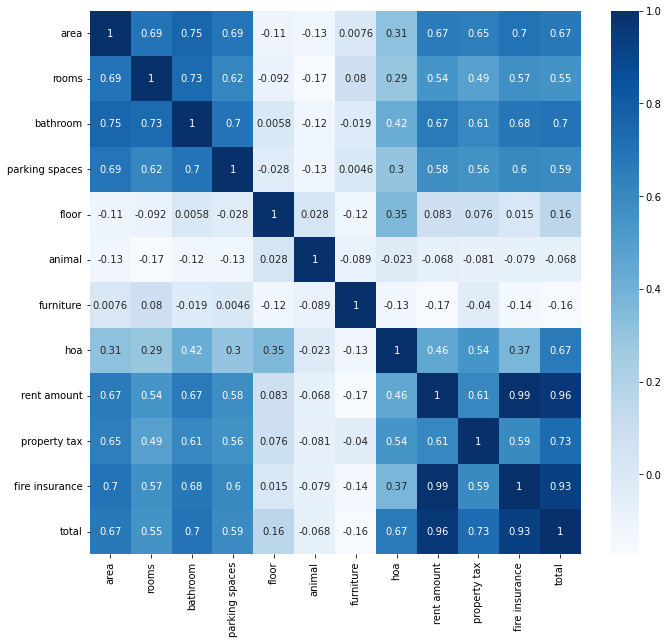

In [4]:
corr = dataset.drop(['city'], axis=1).corr()

plt.figure(figsize=(11,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Blues", annot=True)

Todas as outras colunas apresentam correlações positivas, ou seja, uma relação diretamente proporcional entre as variáveis, menos as colunas floor, animal e furniture.

## Overview

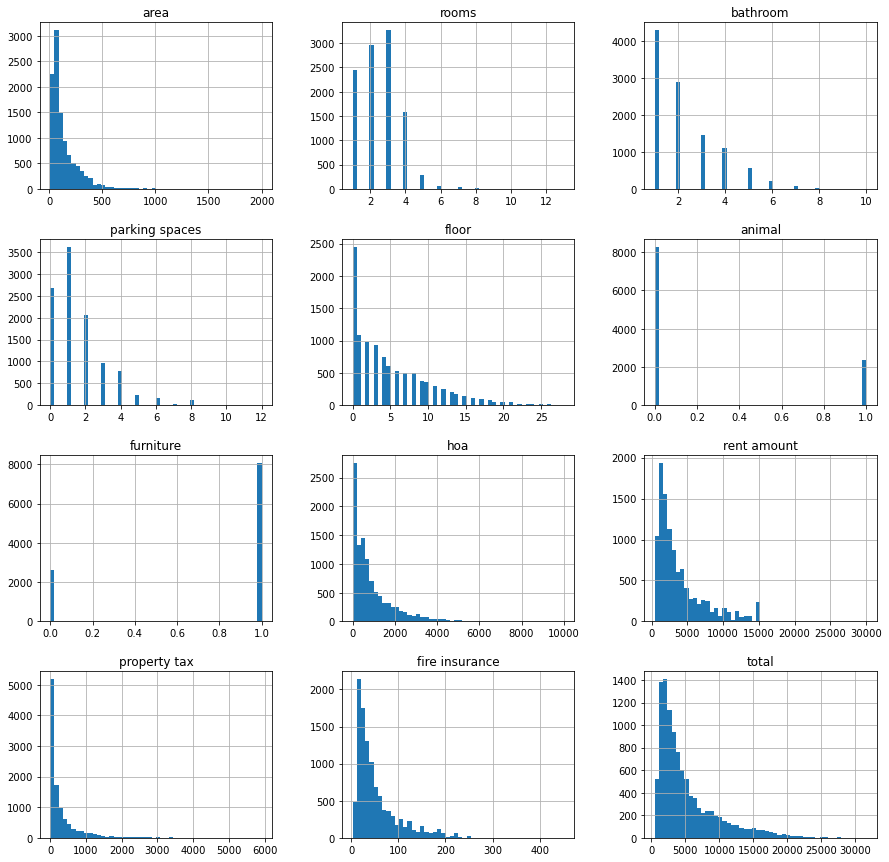

In [5]:
histograma = dataset.hist(bins=50, figsize=(15, 15))

## Exploratory Data Analysis

###  Verificando Algumas Hipóteses

- Influência do animal nos valores do aluguel do imóvel
- Inpacto dos imóveis serem monbiliados sobre o valor do aluguel 
- Influência do andar sobre os alugueis dos imóveis dos apartamentos (a partir do 1 andar)
- Influência da localização (cidade) sobre os alugueis dos imóveis

### Influência do animal (aceitar ou não) nos valores médios do aluguel do imóvel

In [6]:
media_animal = dataset.groupby('animal')['total'].mean().to_frame()
media_animal.rename(index={0: 'Aceita', 1: 'Não Aceita'}, columns={'total': 'Média dos alugueis'}, inplace=True)
media_animal


,Média dos alugueis
animal,
Aceita,5331.675910
Não Aceita,4607.752747


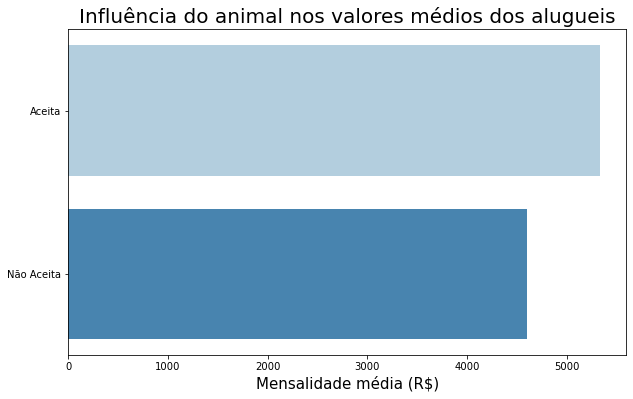

In [7]:
plt.figure(figsize=(10, 6))
barras = sns.barplot(x=media_animal['Média dos alugueis'], y=media_animal.index, data=media_animal, orient='h', palette='Blues')
barras.set_xlabel('Mensalidade média (R$)', fontdict={'fontsize': 15})
barras.set_title('Influência do animal nos valores médios dos alugueis', fontdict={'fontsize': 20})
barras.set(ylabel=None)
plt.show()

In [8]:
media_animal_por_cidade = dataset.groupby(['city', 'animal'])['total'].mean().round(2).reset_index()
media_animal_por_cidade.replace({0: 'Aceita', 1: 'Não aceita'}, inplace=True)
media_animal_por_cidade

,city,animal,total
0,Belo Horizonte,Aceita,4719.46
1,Belo Horizonte,Não aceita,3898.72
2,Campinas,Aceita,3300.27
3,Campinas,Não aceita,2631.56
4,Porto Alegre,Aceita,2987.38
5,Porto Alegre,Não aceita,2844.34
6,Rio de Janeiro,Aceita,4577.00
7,Rio de Janeiro,Não aceita,4352.07
8,São Paulo,Aceita,6502.58
9,São Paulo,Não aceita,5290.52


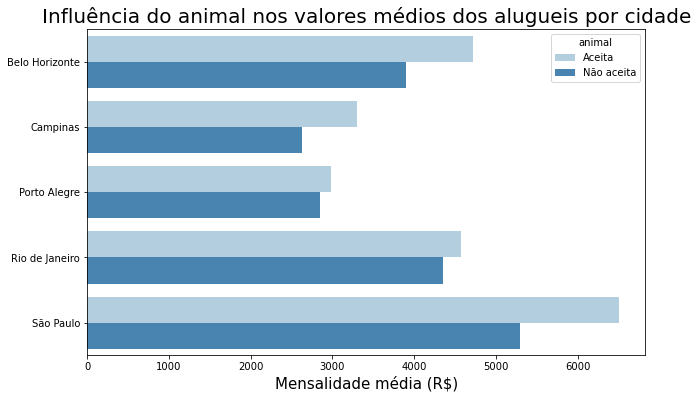

In [9]:
plt.figure(figsize=(10, 6))
barras = sns.barplot(x='total', y='city', hue='animal', data=media_animal_por_cidade, orient='h', palette='Blues')
barras.set_xlabel('Mensalidade média (R$)', fontdict={'fontsize': 15})
barras.set_title('Influência do animal nos valores médios dos alugueis por cidade', fontdict={'fontsize': 20})
barras.set(ylabel=None)
plt.show()

Em média, imóveis que aceitam animais são mais caros em todas as cidades. A cidade de São Paulo possui a maior discrepância de valor dentre as cidades.

### Inpacto dos imóveis serem monbiliados sobre o valor do aluguel

In [10]:
media_mobilia = dataset.groupby('furniture')['total'].mean().round(2).to_frame()
media_mobilia.rename(index={0:'Mobiliada', 1: 'Não mobiliada'}, columns={'total': 'Média dos alugueis'}, inplace=True)
media_mobilia

,Média dos alugueis
furniture,
Mobiliada,6453.97
Não mobiliada,4757.35


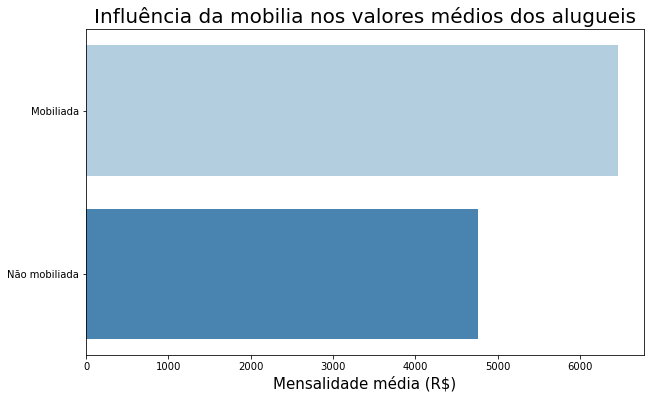

In [11]:
plt.figure(figsize=(10, 6))
barras = sns.barplot(x='Média dos alugueis', y=media_mobilia.index, data=media_mobilia, orient='h', palette='Blues')
barras.set_xlabel('Mensalidade média (R$)', fontdict={'fontsize': 15})
barras.set_title('Influência da mobilia nos valores médios dos alugueis', fontdict={'fontsize': 20})
barras.set(ylabel=None)
plt.show()

In [12]:
media_mobilia_por_cidade = dataset.groupby(['city', 'furniture'])['total'].mean().round(2).reset_index()
media_mobilia_por_cidade.replace({0:'Mobiliada', 1: 'Não mobiliada'}, inplace=True)
media_mobilia_por_cidade

,city,furniture,total
0,Belo Horizonte,Mobiliada,5876.19
1,Belo Horizonte,Não mobiliada,4283.84
2,Campinas,Mobiliada,3808.92
3,Campinas,Não mobiliada,3079.38
4,Porto Alegre,Mobiliada,3818.61
5,Porto Alegre,Não mobiliada,2652.84
6,Rio de Janeiro,Mobiliada,5788.32
7,Rio de Janeiro,Não mobiliada,4067.71
8,São Paulo,Mobiliada,7401.09
9,São Paulo,Não mobiliada,5772.87


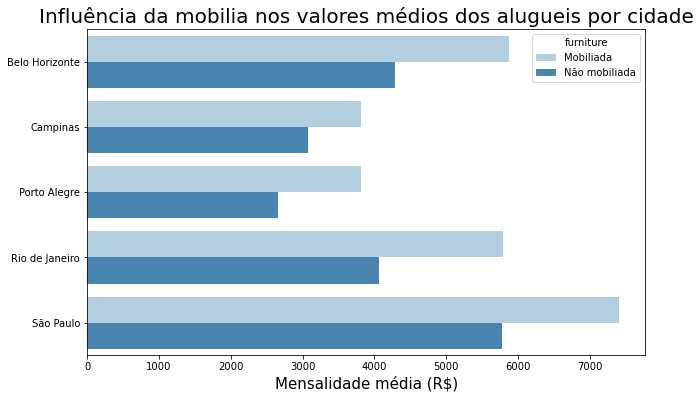

In [13]:
plt.figure(figsize=(10, 6))
barras = sns.barplot(x='total', y='city', hue='furniture', data=media_mobilia_por_cidade, orient='h', palette='Blues')
barras.set_xlabel('Mensalidade média (R$)', fontdict={'fontsize': 15})
barras.set_title('Influência da mobilia nos valores médios dos alugueis por cidade', fontdict={'fontsize': 20})
barras.set(ylabel=None)

# for container in barras.containers:
#     barras.bar_label(container)

plt.show()

Em média, imóveis mobiliadosmais são caros em todas as cidades. A cidade de São Paulo possui a maior discrepância de valor dentre as cidades.

### Influência do andar sobre os alugueis dos imóveis dos apartamentos (a partir do 1 andar)


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10660 non-null  object
 1   area            10660 non-null  int64 
 2   rooms           10660 non-null  int64 
 3   bathroom        10660 non-null  int64 
 4   parking spaces  10660 non-null  int64 
 5   floor           10660 non-null  int64 
 6   animal          10660 non-null  int64 
 7   furniture       10660 non-null  int64 
 8   hoa             10660 non-null  int64 
 9   rent amount     10660 non-null  int64 
 10  property tax    10660 non-null  int64 
 11  fire insurance  10660 non-null  int64 
 12  total           10660 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


In [30]:
media_andar = dataset[dataset['floor'] > 0].groupby('floor')['total'].mean().to_frame()
media_andar['Quantidade'] = dataset.groupby('floor')['floor'].count()
media_andar

,total,Quantidade
floor,,
1,3922.533828,1079
2,3781.795939,985
3,4052.591398,930
4,4539.942359,746
5,5130.663333,600
6,4990.102612,536
7,5457.405242,496
8,5731.457143,490
9,5854.314363,369


Devido a pouca quantidade de informações dos andares supeiores a 22, vamos removelos da análise:

In [32]:
# Selecionando os andares que possui ocorrencia maior que 40
andares = media_andar.query('Quantidade > 40')

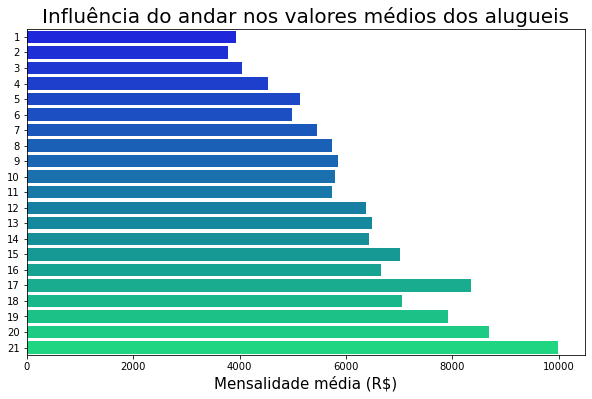

In [33]:
plt.figure(figsize=(10, 6))
barras = sns.barplot(x='total', y=andares.index, data=andares, orient='h', palette='winter')
barras.set_xlabel('Mensalidade média (R$)', fontdict={'fontsize': 15})
barras.set_title('Influência do andar nos valores médios dos alugueis', fontdict={'fontsize': 20})
barras.set(ylabel=None)
plt.show()

É possível perceber uma tendencia de aumento nos valores dos alugueis com o aumento dos andares. As possíveis explicações de acordo com os especialista são a vista e quantidade de ruídos. Um apartamento no andar mais alto proporciona uma melhor vista. Uma menor quantidade de ruídos vindos da rua faz com que os andares superiores sejam os preferidos dos moradores.

### Influência da localização (cidade) sobre os alugueis dos imóveis